# Бинарная классификация, логистическая регрессия

# 🍷 Классифицируем ирисы и вино

#### На этом семинаре мы:
1. Рассмотрим задачу бинарной классивикации на двух разных датасетах
2. Обсудим, когда какие метрики качества стоит использовать
4. Нарисуем ROC-кривую
---

## Чуть-чуть формул

Мы решаем задачу бинарной классификации, в которой целевая переменная $y$ принимает два значения: -1 и 1. Эту задачу можно решить при помощи линейного классификатора

$$
f(x_i, w) = \mathrm{sign}\left(\langle x_i, w \rangle\right).
$$

Функция потерь для такой задачи – это сумма индикаторов того, что предсказание сделано неверно:

$$Q(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \ne \mathrm{sign}\left(\langle x_i, w \rangle\right)].$$


Логистическая регрессия предлагает использовать логистическую функцию потерь:

$$
Q'(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}\log(1 + e^{-y_i \langle x_i, w \rangle}) \rightarrow \min_w.
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Классификация ирисов

### Загрузка данных

Рассмотрим свойства логистической регрессии на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трех классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка.

В sklearn есть некоторое количество учебных датасетов, включая датасет с ирисами. Загрузим данные оттуда и сразу выделим целевую переменную

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Благодаря тому, что загрузили учебный датасет из sklearn, можем легко и удобно вывести информацию о нем одной командой

In [ ]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Перекодирование целевой переменной

На датасете по ирисам можно решать задачу многоклассовой классификации, но в этом ноутбуке мы легким движением руки сделаем задачу бинарной: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам.

Для этого перекодируем целевую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку -1.

Сейчас вектор целевой переменной выглядит так

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

У нас есть три класса ирисов, можем посмотреть их названия. Наш целевой класс сейчас закодирован цифрой 1

In [ ]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

И перекодируем целевую переменную

In [ ]:
y[y != 1] = -1

Проверим результат

In [ ]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Обработка признаков

В этом ноутбуке мы сконцентриуемся непосредственно на задаче классификации и пропустим этап EDA. Волевым решением оставим только два признака: `sepal length (cm)` и `sepal width (cm)`.
Отделим их в отдельную матрицу, разделим выборку на обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

In [ ]:
X = X[['sepal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)





Отмасштабируем выборки при помощи StandardScaler

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Вопрос** Почему мы с помощью разных методов мастабируем обучающую и тестовую выборки?

Выведем диаграмму рассеяния для признаков

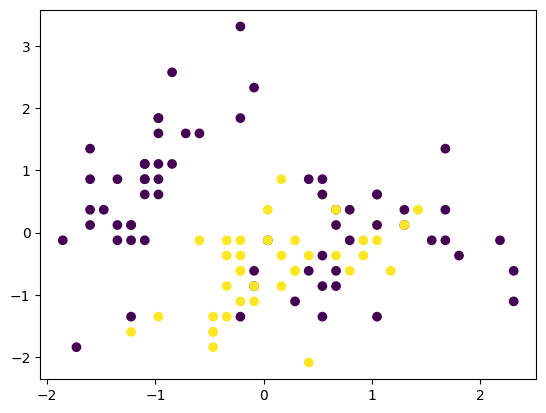

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train);

**Вопрос:** О чем нам говорит полученная диаграмма?

### Обучение модели

Обучим логистическую регрессию на тренировочной выборке.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print(lr.coef_)

[[ 0.1816305  -1.04223331]]


**Вопрос:** Как можем проинтерпретировать полученные веса?

### Метрика качества

Для задачи классификации используются:

- Accuracy (доля правильных ответов)
- Precision (точность)
- Recall (полнота)
- F-мера (метрика, сочетающая точность и полноту)

**Вопрос:** Как выбрать метрику?

Посмотрим на распределение классов

In [ ]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

-1    65
 1    40
Name: count, dtype: int64
-1    35
 1    10
Name: count, dtype: int64


**Вопрос:** Подходит ли Accuracy? А F-мера?

In [ ]:
from sklearn.metrics import f1_score
print('F1-мера: ', f1_score(y_test, lr.predict(X_test)))

F1-мера:  0.6956521739130435


Построим решающую поверхность для нашего классификатора

In [ ]:
#pip install mlxtend

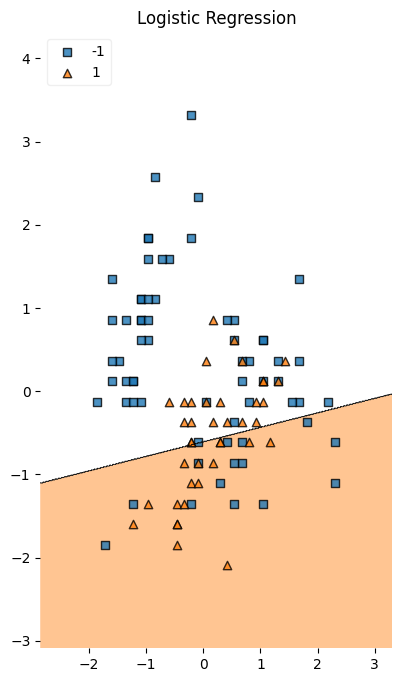

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression']
for clf, lab, grd in zip([lr],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Влияние коэффициента регуляризации

Обучим три различные логистические регрессии с разным параметром регуляризации $\alpha$ (обратите внимание, что в реализации `sklearn` $C = 1/\alpha$)

In [ ]:
C = [0.01, 0.05, 10]
# ConvergenceWarning
lr1 = LogisticRegression(C = C[0])
lr2 = LogisticRegression(C = C[1])
lr3 = LogisticRegression(C = C[2])

Посмотрим, как изменяется разделяющая поверхность в зависимости от $\alpha$

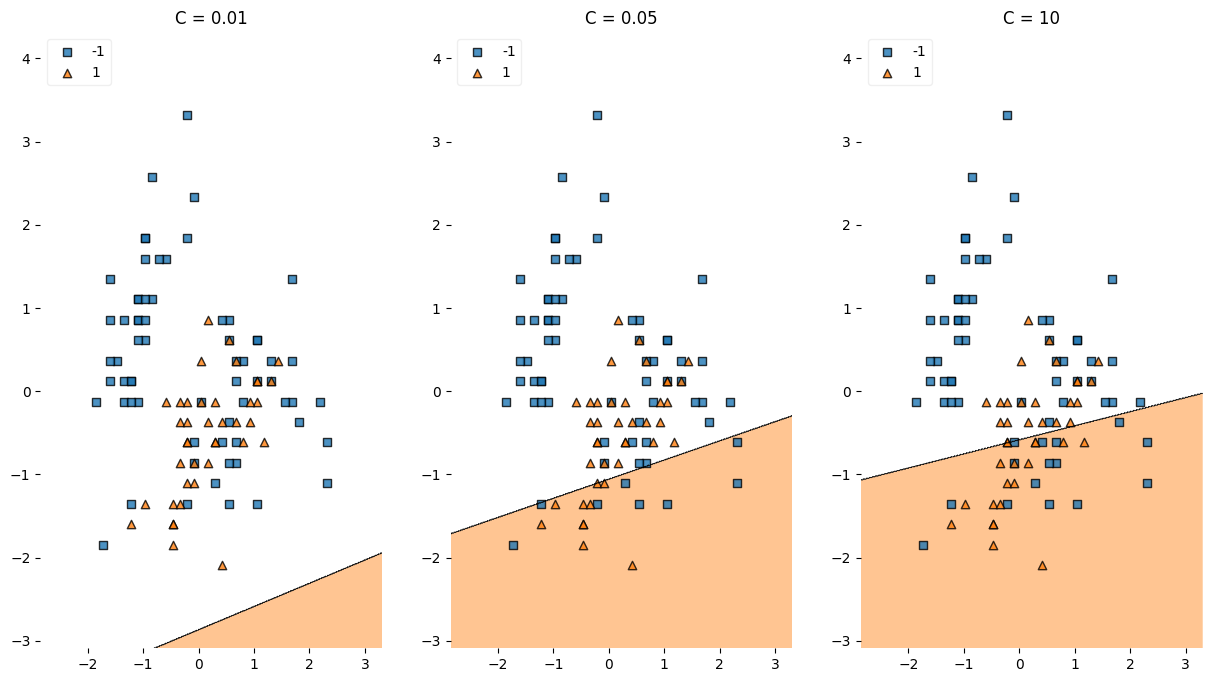

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['C = 0.01', 'C = 0.05', 'C = 10']
for clf, lab, grd in zip([lr1, lr2, lr3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Классификация вина

---



### Загружаем данные

Мы будем работать с [набором данных](https://www.kaggle.com/piyushgoyal443/red-wine-dataset?select=wineQualityReds.csv), содержащим информацию о характеристиках вина. Каждое наблюдение принадлежит к одному из 10 категорий качества вина, и наша задача заключается в том, что предсказать эту категорию.

In [ ]:
RED_WINE = 'https://github.com/evgpat/ml_course_basic/raw/refs/heads/main/datasets/wineQualityReds.csv'

data = pd.read_csv(RED_WINE)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Посмотрим, какого качества вино есть в датасете

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Убедимся, что нет пропусков

In [ ]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Как указано в описании набора, в нём нет пропущенных значений, и все переменные являются непрерывными. Целевая переменная – `quality`.

In [ ]:
data['quality'].value_counts(normalize=True)

,proportion
quality,
5,0.425891
6,0.398999
7,0.124453
4,0.033146
8,0.011257
3,0.006254


### Перекодирование целевой переменной

Снова перейдем к задаче бинарной классификации и будем предсказывать только наиболее популярную категорию качества.

Закодируем столбец `quality` так, чтобы наиболее частая категория (это категория 5) получила метку 1, а все прочие категории – метку -1.

In [ ]:
qual = data['quality'].copy()
qual[qual != 5] = -1
qual[qual == 5] = 1

Сразу проверим баланс классов

In [ ]:
qual.value_counts()

,count
quality,
-1,918
1,681


In [ ]:
681/len(qual)

0.425891181988743

### Обработка признаков

Разделим признаки и целевую переменную, выборку - на тренировочную и тестовую, при помощи `StandardScaler` отмасштабируем данные

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis = 1), qual, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

И посмотрим на диаграмму.

**Вопрос:** В чем отличие от предыдущего датасета?

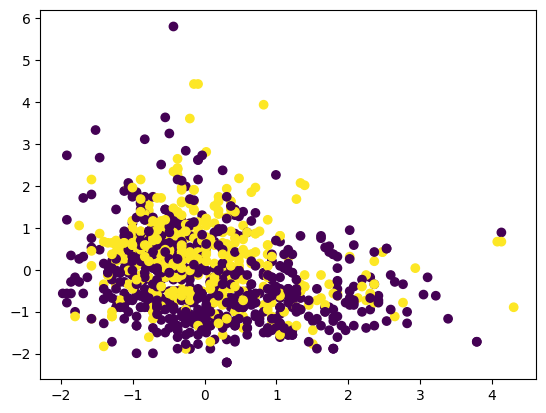

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train);

### Подбор коэффициента регуляризации с помощью кросс-валидации

При помощи кросс-валидации подберем оптимальные значения коэффициентов регуляризации для логистической регрессии и обучим модель с этими параметрами.

In [ ]:
from sklearn.model_selection import cross_validate

scores_lr = []

for c in np.arange(0.1, 10, 1):
    lr = LogisticRegression(C = c)

    cv_lr = cross_validate(lr, X_train, y_train, cv = 5, scoring = 'f1')['test_score']

    scores_lr.append(cv_lr.mean())

Выведем значения метрики качества

In [ ]:
scores_lr

[np.float64(0.6813792197271316),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385)]

In [ ]:
max(scores_lr)

np.float64(0.6813792197271316)

In [ ]:
np.argmax(scores_lr)

np.int64(0)

In [ ]:
np.arange(0.1, 10, 1)[np.argmax(scores_lr)]

np.float64(0.1)

И обучим можель с наилучшим параметром регуляризации

In [ ]:
lr = LogisticRegression(C = 0.1)

lr.fit(X_train, y_train)

print(f1_score(y_test, lr.predict(X_test)))

0.649746192893401


**Вопрос:** Насколько хороша модель? Что можно сделать, чтобы его улучшить?

### ROC-кривая

Рассмотрим внимательно метрику ROC AUC.

Для начала вспомним, что мы работаем с матрицей ошибок:

|       | alg = 1          | alg = -1    |
|-------| -----------------|-------------|
|y = 1  |TP                |FN           |
|y = -1 |FP                | TN          |

Определим следующие величины:

$$
TPR \text{ (true positive rate, recall, sensitivity)} = \dfrac{TP}{TP + FN} –
$$
доля правильно предсказанных объектов положительного класса.

$$
FPR \text{ (false positive rate, 1 - specificity)} = \dfrac{FP}{FP + TN} –
$$
доля неправильно предсказанных объектов отрицательного класса.

Рассмотрим задачу мягкой классификации: мы предказываем вероятности принадлежности наблюдения к положительному и отрицательному классам. Тогда TPR и FPR будут зависеть от порога для вероятности, выше которого наблюдение будет отнесено к положительному классу. ROC-кривая строится в координатах $(FPR, TPR)$ и показывает комбинации TPR и FPR при всевозможных значениях порога.

Для хорошего классификатора эта кривая является вогнутой, а для идеального классификатора она будет проходить через точку $(0, 1)$ (почему?).

[<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png" alt="drawing" width="350"/>](https://ru.wikipedia.org/wiki/ROC-кривая)




Построим ROC-кривую для следующей выборки

In [ ]:
# True labels
y = [-1, 1, 1, -1, 1, 1]
# Predicted labels
p = [0.5, 0.1, 0.2, 0.9, 0.7, 0.1]

Упорядочим наблюдения по убыванию ответов алгоритма.

In [ ]:
y = [-1, 1, -1, 1, 1, 1]
p = [0.9, 0.7, 0.5, 0.2, 0.1, 0.1]

Разобьем единичный квадрат на $(m, n)$ частей, где $m$ – число 1 в $y$, $n$ – число нулей. Стартуем из точки $(0, 0)$. Если значение $y$ равно 1, делаем шаг вверх, а если -1 – вправо. Понятно, что конечная точка нашего маршрута – точка $(1, 1)$.


**Важный момент:** если у нескольких объектов значения предсказаний равны, а $y$ – различны, то мы должны сделать ход "по диагонали".


In [ ]:
from sklearn.metrics import roc_curve, auc

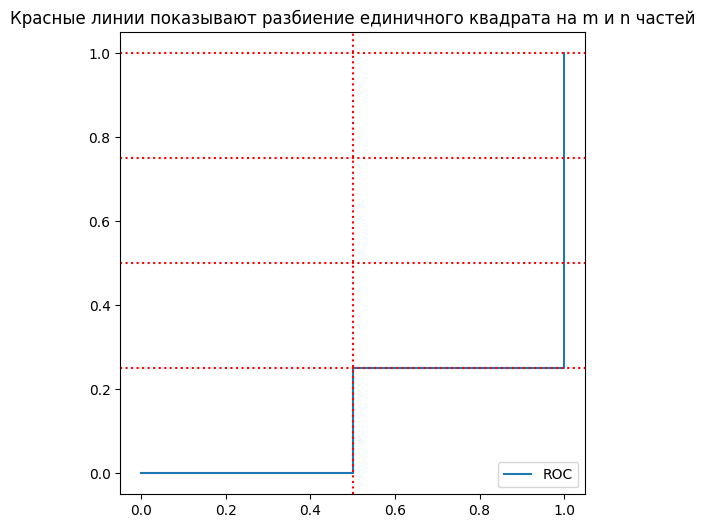

In [ ]:
fpr, tpr, _ = roc_curve(y, p)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="ROC")
plt.axvline(0.5, linestyle="dotted", c="red")
plt.axhline(0.25, linestyle="dotted", c="red")
plt.axhline(0.5, linestyle="dotted", c="red")
plt.axhline(0.75, linestyle="dotted", c="red")
plt.axhline(1.0, linestyle="dotted", c="red")
plt.title("Красные линии показывают разбиение единичного квадрата на m и n частей")
plt.legend();

Полученная кривая и является ROC-кривой.

**(Почему этот алгоритм имеет смысл?)**

**Пример с диагональным шагом**


Сформируем другие данные

In [ ]:
p = [0.5, 0.1, 0.2, 0.6, 0.2, 0.3, 0.0]
y = [-1, -1, -1, 1, 1, 1, -1]

In [ ]:
fpr, tpr, _ = roc_curve(y, p)

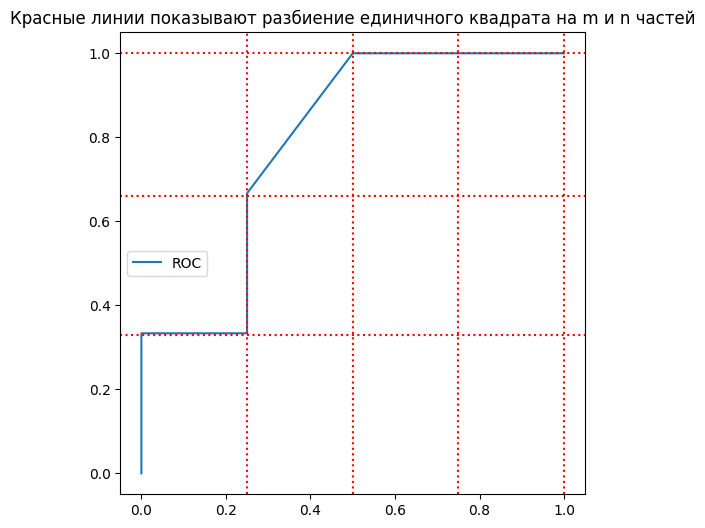

In [ ]:
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = 'ROC')
plt.axvline(0.25, linestyle = 'dotted', c = 'red')
plt.axvline(0.5, linestyle = 'dotted', c = 'red')
plt.axvline(0.75, linestyle = 'dotted', c = 'red')
plt.axvline(1.0, linestyle = 'dotted', c = 'red')
plt.axhline(0.33, linestyle = 'dotted', c = 'red')
plt.axhline(0.66, linestyle = 'dotted', c = 'red')
plt.axhline(1.0, linestyle = 'dotted', c = 'red')
plt.title('Красные линии показывают разбиение единичного квадрата на m и n частей')
plt.legend()

### ROC AUC
Площадь под ROC-кривой – равна доле пар наблюдений $(y = 1, y = -1)$, которые алгоритм верно упорядочил. Таким образом, чем больше ROC AUC, тем качественнее отработал классификатор. Вычислите ROC AUC для построенной ROC-кривой.

Построим ROC-кривую для нашего датасета с вином и рассчитаем площадь под ней

Обучим модель

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Выведем график

In [ ]:
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

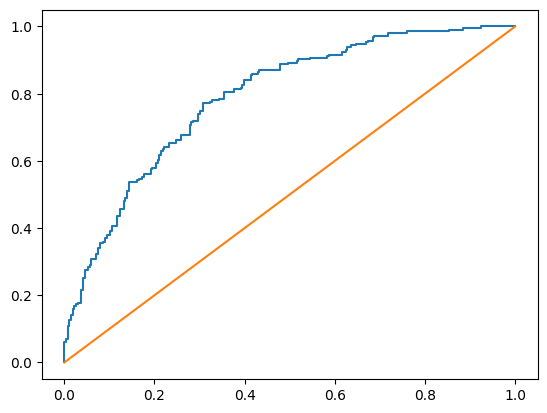

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr);

Посчитаем площадь

In [ ]:
print(f'Площадь по ROC-кривой составляет {auc(fpr, tpr)}')

Площадь по ROC-кривой составляет 0.7891399058393648
